# Random generation of $n$-flakes 

See [here](https://en.wikipedia.org/wiki/N-flake) for definition.
The iterative process is as follows:
1. Choose any point $x_0$ in the plane
2. Randomly select one out of the $n$ vertices of a polygon: $v_i$
3. Update $x_0:=\lambda_n x_0 + (1-\lambda_n) v_i$ and repeat

For a polygon of $n$ sides, the step size is given by $$\lambda_n = \frac{1}{2}\cdot\left(\sum_{k=1}^{\left\lfloor\tfrac{n}{4}\right\rfloor}\cos\frac{2k\pi}{n}\right)^{-1}$$

In [1]:
import numpy as np
import random
%matplotlib inline  
import matplotlib.pyplot as plt

In [2]:
def dice(n):
    return random.randint(0,n-1)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return [x, y]

def make_shape(n):
    return np.array([pol2cart(1,2*k*np.pi/n) for k in np.arange(0,n)])

def lambda_(n):
    up = np.floor(n/4)
    up = up if up else 0
    sumcos = np.sum([np.cos(2*np.pi*(x+1)/n) for x in np.arange(up)])
    return 1/(2*(sumcos+1))

Choose number of side $n$

In [3]:
n = 5
lambd = lambda_(n)
shape = make_shape(n)
current = [0.,0.]
position_log = np.array(current)

(-0.9027533877018192,
 1.0937363933268716,
 -1.0499563180350442,
 1.049956318035044)

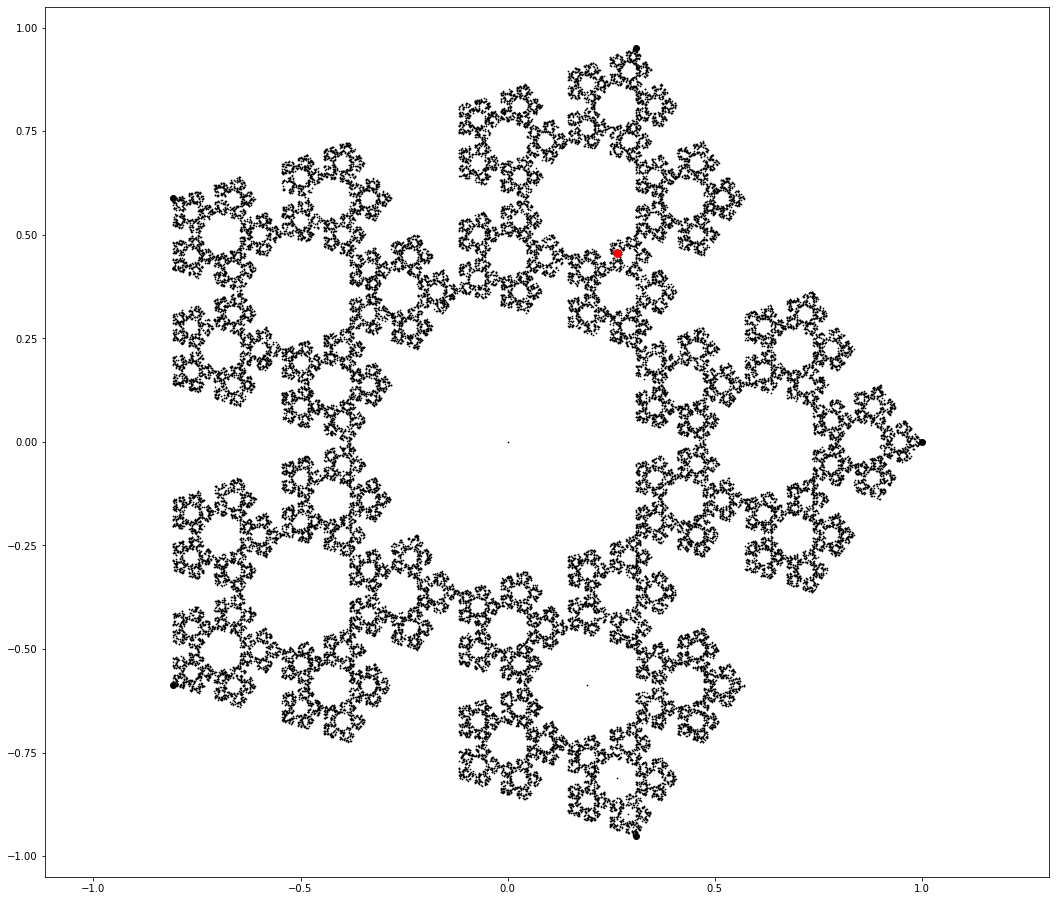

In [4]:
N = 50000
for _ in np.arange(0,N):
    selected = dice(n)
    for j in np.arange(0,shape.shape[1]):
        current[j] = current[j]*(lambd)+shape[selected,j]*(1-lambd)
    position_log = np.vstack([position_log, current]) #if current not in position_log else position_log
fig=plt.figure(figsize=(18,16))
plt.scatter(shape[:,0],shape[:,1],c = 'black',marker = 'o',alpha = 1)
plt.scatter(position_log[:,0], position_log[:,1], s=.5, c=('black'))
plt.scatter(position_log[-1,0], position_log[-1,1], s=60, c=('red'))
plt.axis('equal')